# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from math import sqrt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

# Loading Dataset

In [ ]:
df = pd.read_excel("/content/AirQualityUCI.xlsx")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


# Data Preprocessing

# Checking Null Values

In [ ]:
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
# % of null values present in each colunmn
percent_NaN = []
columns = df.columns
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
nan_percent_df

,%_NaN_in_Column
NMHC(GT),90.231912
CO(GT),17.986534
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


<Figure size 1000x500 with 0 Axes>

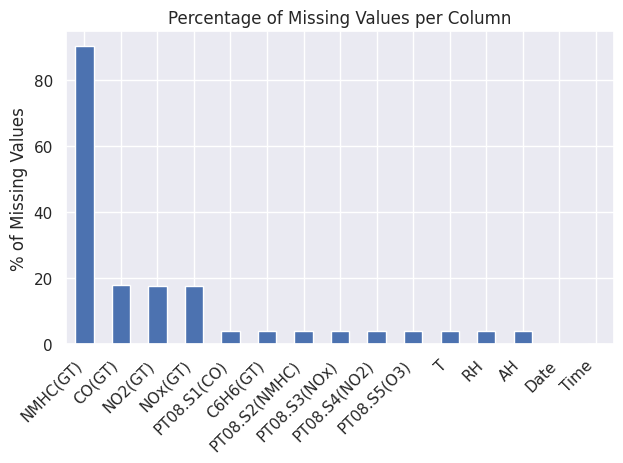

In [ ]:
percent_NaN = (df.isnull().sum() / df.shape[0]) * 100
nan_percent_df = pd.DataFrame(percent_NaN, columns=['%_NaN_in_Column']).sort_values(by='%_NaN_in_Column', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
nan_percent_df.plot(kind='bar', legend=False)
plt.title('Percentage of Missing Values per Column')
plt.ylabel('% of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the padding of the figure

# Display the plot
plt.show()

# Dropping Columns with high NULL values

In [ ]:
df.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
df = df.dropna()
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df.shape

(6941, 14)

# Cleaning DateTime data

In [ ]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)
df['DateTime'] =  (df.Date) + ' ' + (df.Time)
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month']   = df['DateTime'].dt.month_name()
df['Hour']    = df['DateTime'].dt.hour
df['Date']    = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('Time', axis=1, inplace=True, errors = 'ignore')
df.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00,Wednesday,March,22


In [ ]:
df = df[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df.shape

(6941, 17)

In [ ]:
df.columns

Index(['Date', 'Month', 'Weekday', 'DateTime', 'Hour', 'CO(GT)', 'PT08.S1(CO)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

# Checking for Outliers

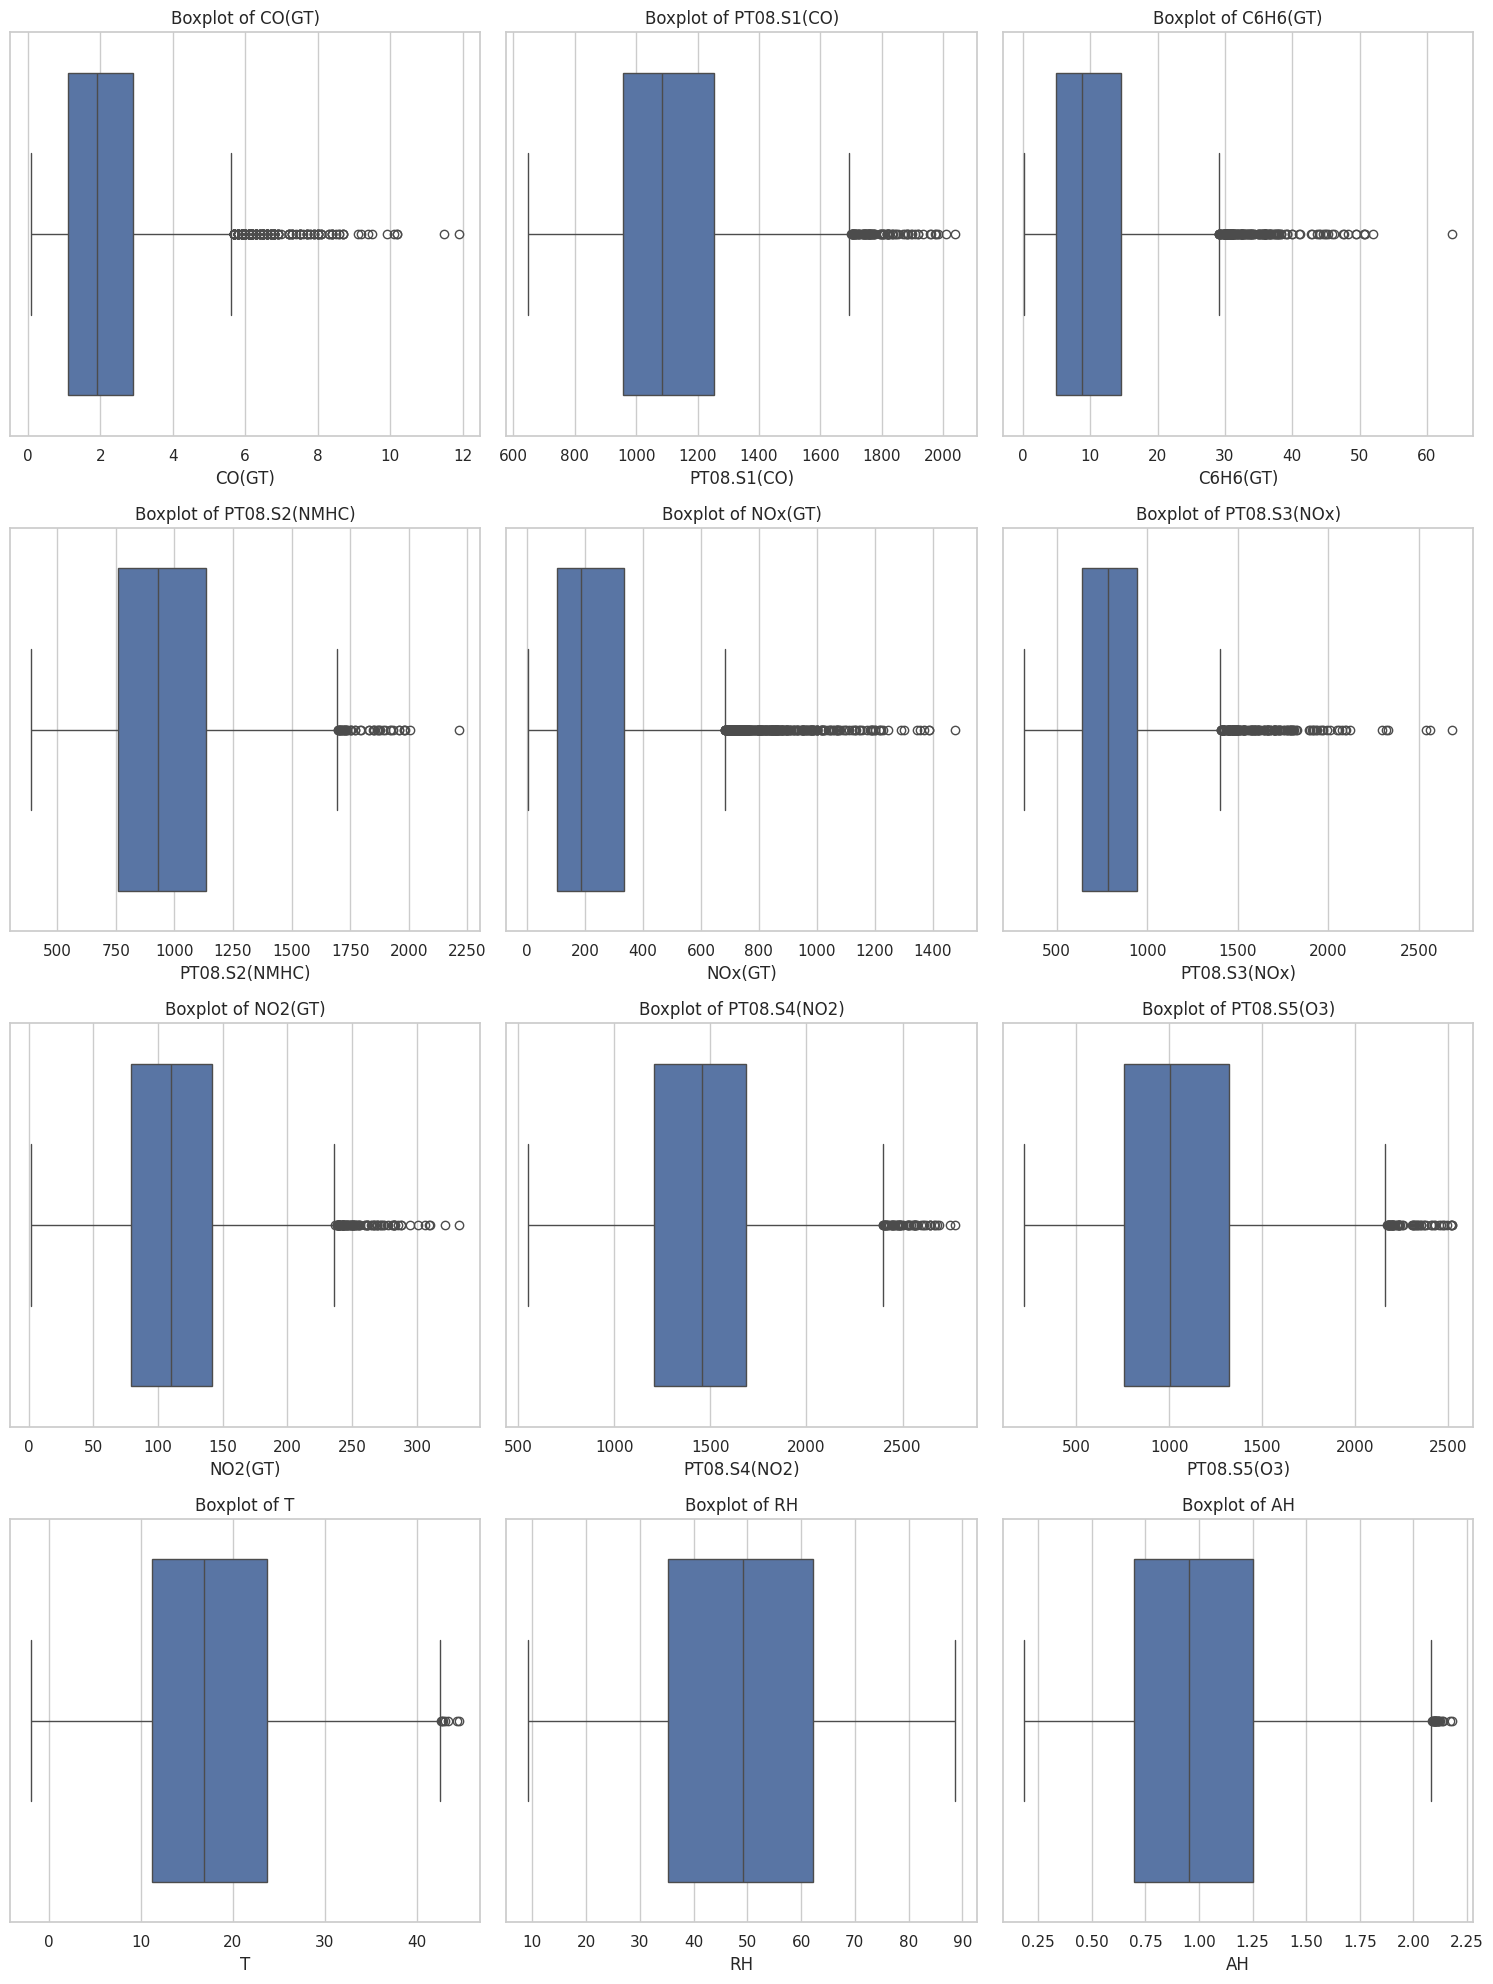

In [ ]:
sns.set_theme(style="whitegrid")
# Boxplots of columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(df.columns[5:]):
    if column != 'Date':
        df[column] = pd.to_numeric(df[column], errors='coerce')

    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(len(df.columns) - 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Remove Outliers

1. Calculate the IQR for the target column.
2. Define the lower and upper bounds as:
   - Lower Bound: \( Q1 - 1.5 \times IQR \)
   - Upper Bound: \( Q3 + 1.5 \times IQR \)
   where \( Q1 \) and \( Q3 \) are the first and third quartiles, and \( IQR \) is the Interquartile Range.
3. Filter the DataFrame to remove rows where the target column values fall outside the bounds.

In [ ]:
cols = df.columns[5:]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

scale = 1.4

lower_lim = Q1 - scale * IQR
upper_lim = Q3 + scale * IQR

condition = ~((df[cols] < lower_lim) | (df[cols] > upper_lim)).any(axis=1)
df_new = df[condition]

outliers_removed = len(df) - len(df_new)
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 846


In [ ]:
# Updated Dataframe ( after outlier removal)
df_new.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df_new.shape

(6095, 17)

# Removing Reference Analyzers
These columns are not used for modelling hence we are removing these columns ( These columns are not sensor values)

In [ ]:
df_new.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
df_new.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
df_new.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore')
df_new.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore')
df_new.head()

,Date,Month,Weekday,DateTime,Hour,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,1360.00,1045.50,1056.25,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,1292.25,954.75,1173.75,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,1402.00,939.25,1140.00,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,1375.50,948.25,1092.00,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1272.25,835.50,1205.00,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df_new.shape

(6095, 13)

# EDA

# Splitting the dataset based on Month, Week and Hour for EDA

In [ ]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June',
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filtering based on Month
for month in months:
    temp_df = df_new.loc[(df_new['Month'] == month)]
    month_df_list.append(temp_df)

# Filtering based on Day
for day in days:
    temp_df = df_new.loc[(df_new['Weekday'] == day)]
    day_df_list.append(temp_df)

# Filtering based on Hour
for hour in range(24):
    temp_df = df_new.loc[(df_new['Hour'] == hour)]
    hour_df_list.append(temp_df)

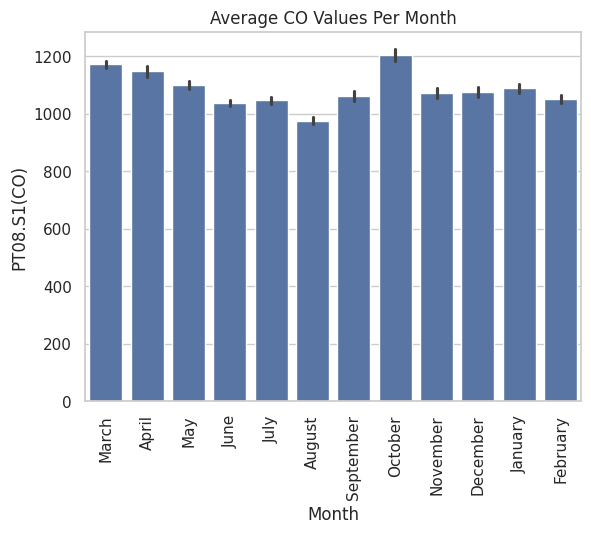

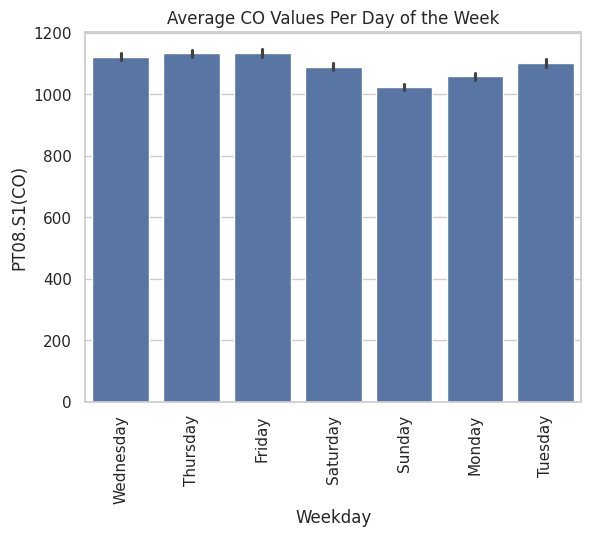

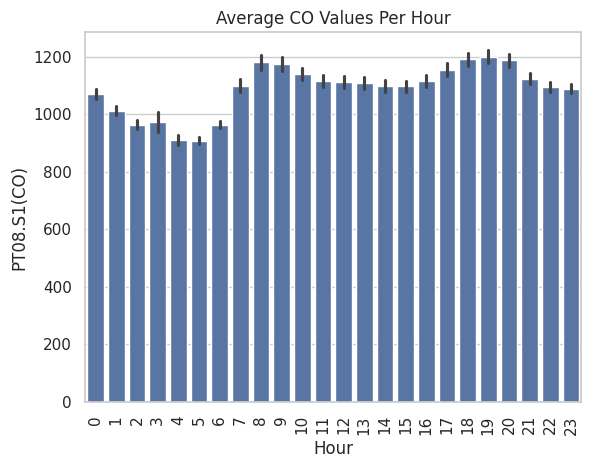

In [ ]:
# Barplot of Monthly CO emissions
sns.barplot(x = 'Month', y = 'PT08.S1(CO)', data = df_new)
plt.title('Average CO Values Per Month')
plt.xticks(rotation=90)
plt.show()

# Barplot of Weekly CO emissions
sns.barplot(x = 'Weekday', y = 'PT08.S1(CO)', data = df_new)
plt.title('Average CO Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

# Barplot of Hourly CO emissions
sns.barplot(x = 'Hour', y = 'PT08.S1(CO)', data = df_new)
plt.title('Average CO Values Per Hour')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Final DataFrame
df_final = df_new.iloc[:, 5:]
df_final

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.00,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,1292.25,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,1402.00,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,1375.50,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,1272.25,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...
9352,1314.25,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
9353,1162.50,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
9354,1142.00,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
9355,1002.50,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
# Columns in the Final DataFrame
df_final.columns

Index(['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Correlation Plots for Feature Selection

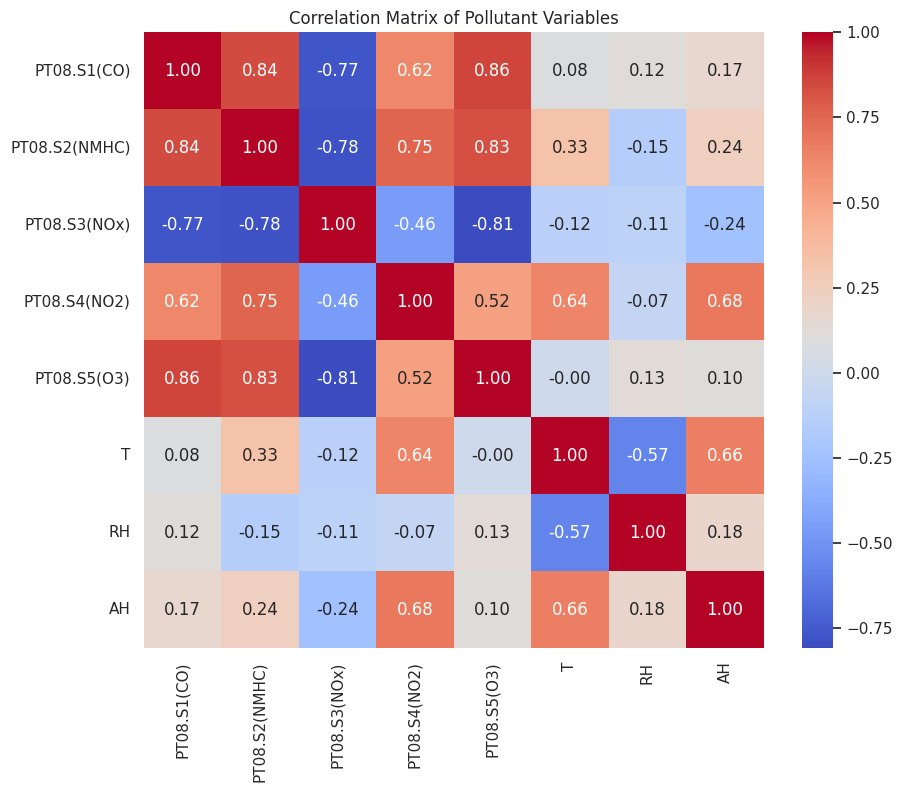

In [ ]:
# Calculate correlation matrix
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
pollutant_data = df_new[pollutants]

correlation_matrix = pollutant_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Pollutant Variables")
plt.show()

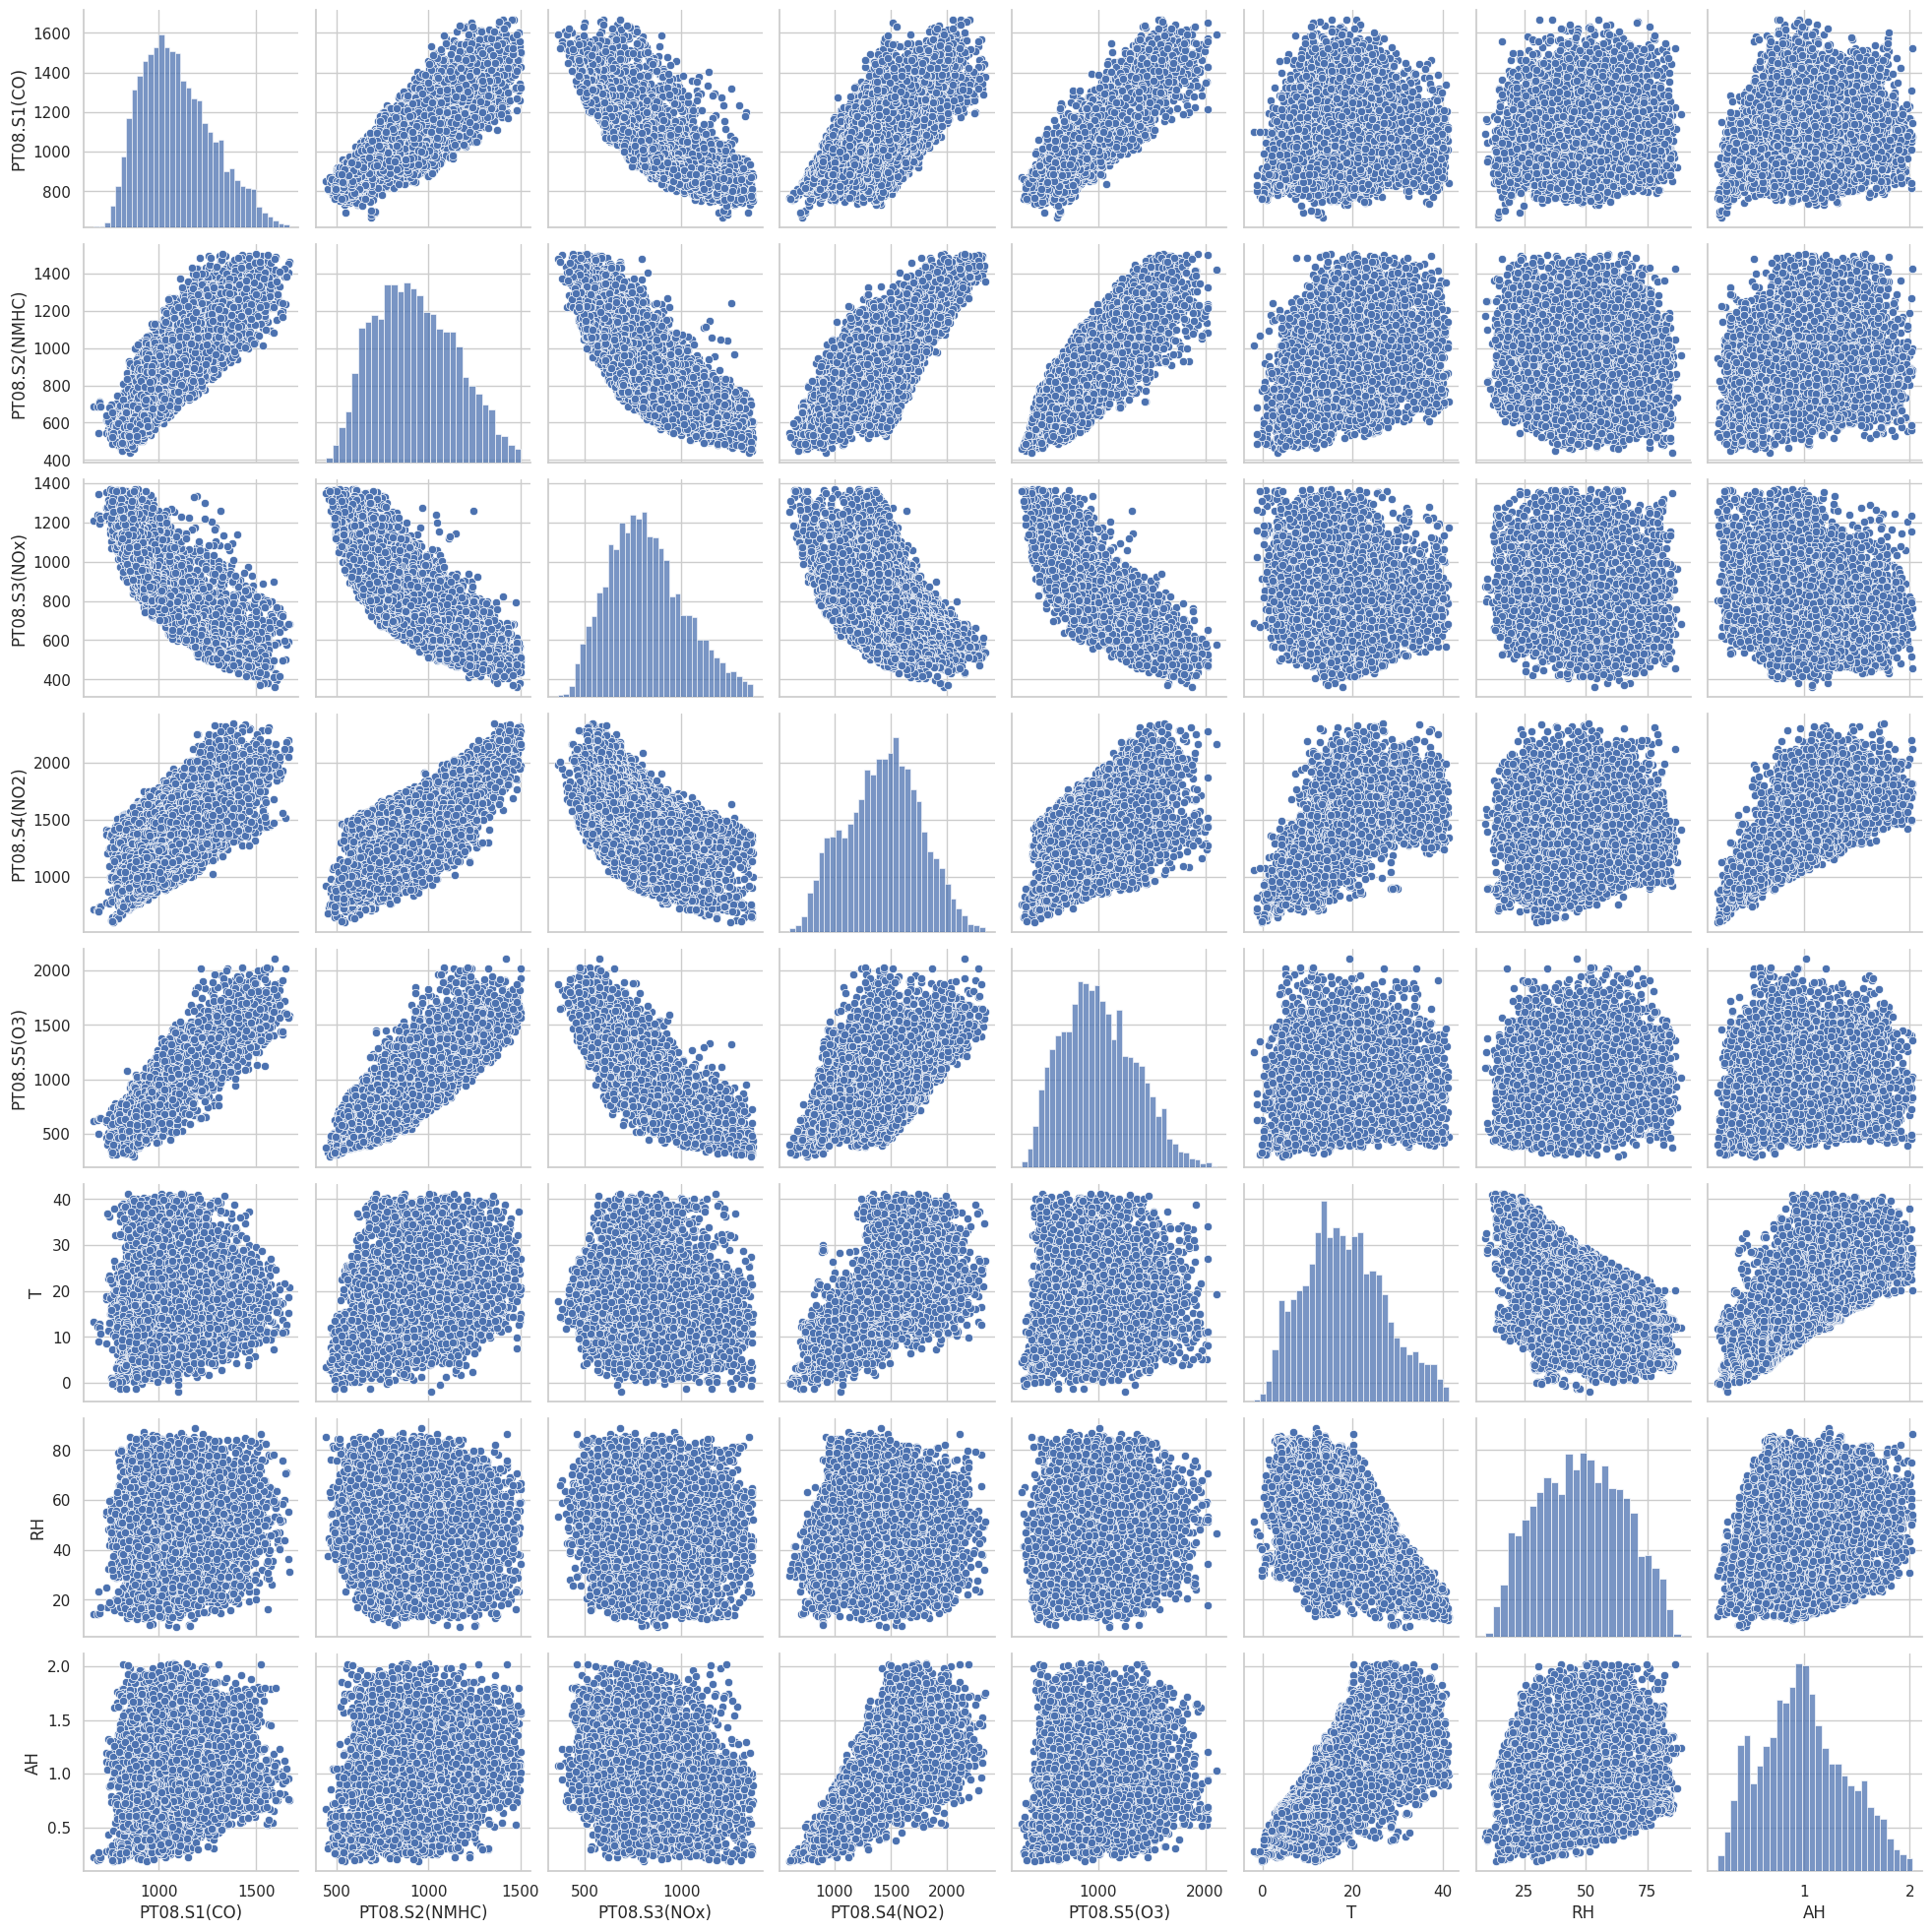

In [ ]:
# Visualization as Pairplots
sns.pairplot(pollutant_data)
plt.show()

In [ ]:
# Drop 'T', 'RH', and 'AH' columns ( Removal after Feature Selection for Modelling)
df_final.drop(columns=['T','RH','AH'], inplace=True)
df_final.head(5)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
0,1360.00,1045.50,1056.25,1692.00,1267.50
1,1292.25,954.75,1173.75,1558.75,972.25
2,1402.00,939.25,1140.00,1554.50,1074.00
3,1375.50,948.25,1092.00,1583.75,1203.25
4,1272.25,835.50,1205.00,1490.00,1110.00


In [ ]:
df_final.shape

(6095, 5)

# Modelling for predicting CO

# Model Comparisons
- Linear Regression:
- Decision Tree:
- Random Forest:
- Gradient Boosting:
- SVR:
- MLP:

In [ ]:
co_concentration = df_final['PT08.S1(CO)']
predictors = ['PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
predictor_data = df_final[predictors]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_data, co_concentration, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

results = []

# Train and evaluate models
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R-squared': r2_test,
    })

# Display results
results_df = pd.DataFrame(results)
results_df


,Model,RMSE,R-squared
0,Linear Regression,83.855845,0.792427
1,Decision Tree,87.089389,0.776110
2,Random Forest,65.790358,0.872230
3,Gradient Boosting,72.529068,0.844716
4,SVR,89.985875,0.760970


# Actual vs Predicted for Best Model

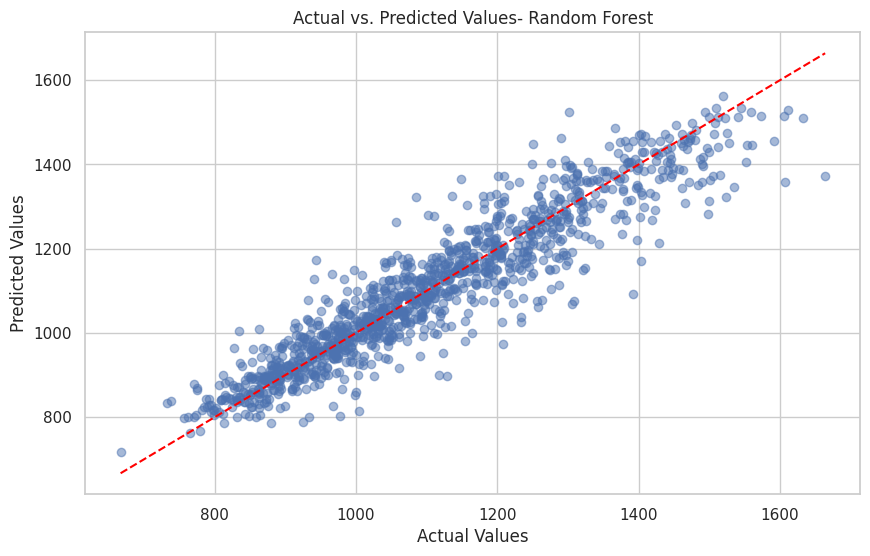

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)


y_pred = rfr.predict(X_test_scaled)
# Scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values- Random Forest')
plt.grid(True)
plt.show()


Feature ranking:
1. Feature 'PT08.S5(O3)' (0.6910769538369099)
2. Feature 'PT08.S2(NMHC)' (0.12475325901843794)
3. Feature 'PT08.S3(NOx)' (0.10195248586531871)
4. Feature 'PT08.S4(NO2)' (0.08221730127933348)


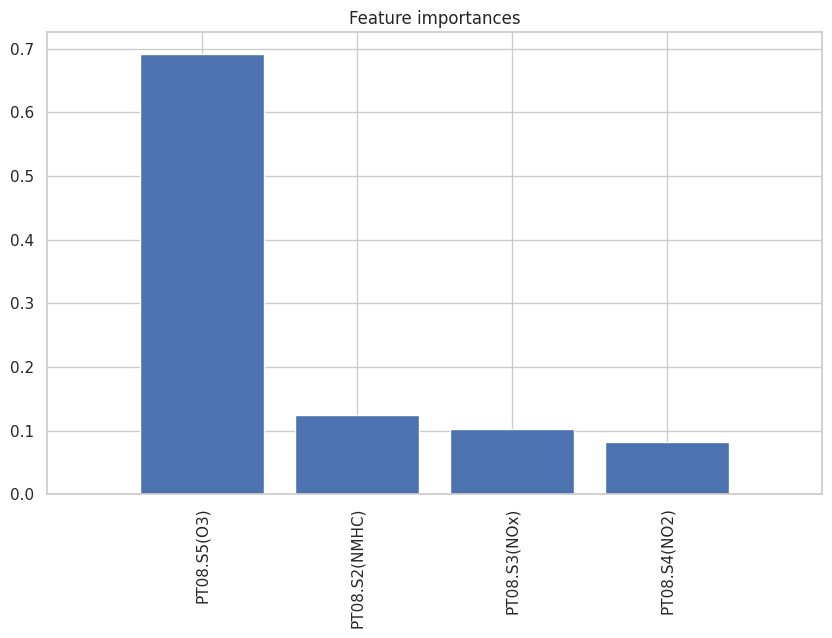

In [ ]:
# Feature importance from Random forest
importances = rfr.feature_importances_
features = X_train.columns
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature '{features[idx]}' ({importances[idx]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[idx] for idx in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# **MLP**

 Implementing the MLP model using 'GridSearchCV' for hyperparameter tuning. Multi-layer Perceptron (MLP) is an artificial neural network with multiple layers of nodes that utilize feedforward architecture for learning complex data relationships.

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128, 64, 32), 'solver': 'lbfgs'}
R2 Score: 0.8756592863214302
Root Mean Squared Error: 64.90153326653204


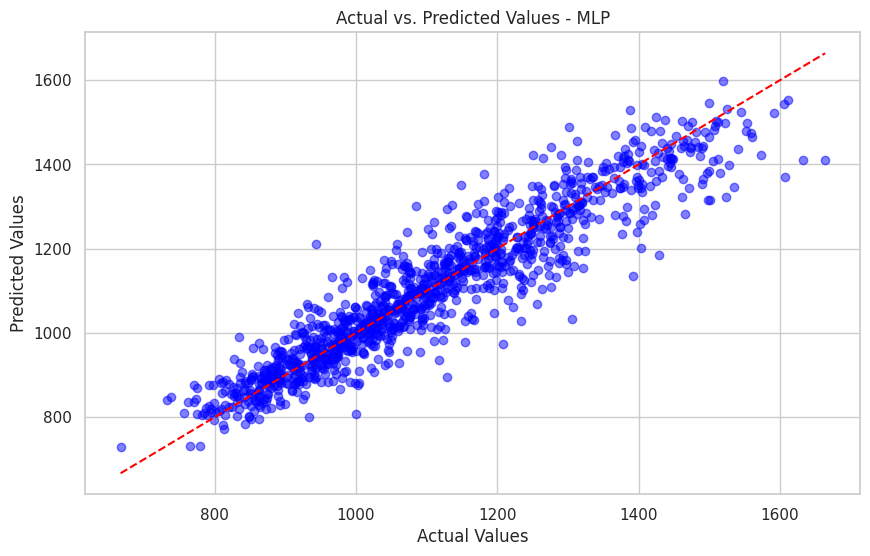

In [ ]:
# Tuned MLP
random.seed(42)

data = df_final.copy()

# Define features (X) and target variable (y)
X = data.drop(columns=['PT08.S1(CO)'])
y = data['PT08.S1(CO)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32),(256,128,64,32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
}

# Build the MLP model
model = MLPRegressor(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Train the best model
fit=best_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - MLP')
plt.grid(True)
plt.show()

